<a href="https://colab.research.google.com/github/nkatara/iiit-ai-ml/blob/main/Copy_of_Demo_Voting_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint
## Not for grading

## Setup Steps

In [1]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2501952" #@param {type:"string"}


In [2]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "8439328088" #@param {type:"string"}


In [3]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()

notebook= "Demo_Voting_Classifier" #name of the notebook
Answer = "Ungraded"
def setup():
#  ipython.magic("sx pip3 install torch")
    from IPython.display import HTML, display
    ipython.magic("sx wget https://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/Sample_data.csv")
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():

    ipython.magic("notebook -e "+ notebook + ".ipynb")

    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:
        print(r["err"])
        return None
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getComplexity() and getAdditional() and getConcepts() and getComments():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional,
              "concepts" : Concepts, "record_id" : submission_id,
              "id" : Id, "file_hash" : file_hash,
              "feedback_experiments_input" : Comments, "notebook" : notebook}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:
        print(r["err"])
        return None
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://learn-iiith.talentsprint.com/notebook_submissions")
        # print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
      return submission_id
    else: submission_id


def getAdditional():
  try:
    if not Additional:
      raise NameError
    else:
      return Additional
  except NameError:
    print ("Please answer Additional Question")
    return None
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None

def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None

def getId():
  try:
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()

else:
  print ("Please complete Id and Password cells before running setup")


Setup completed successfully


# Importing Library

In [4]:
import sklearn.datasets
import matplotlib.pyplot as plt
import numpy as np

#### Generating dataset & plotting

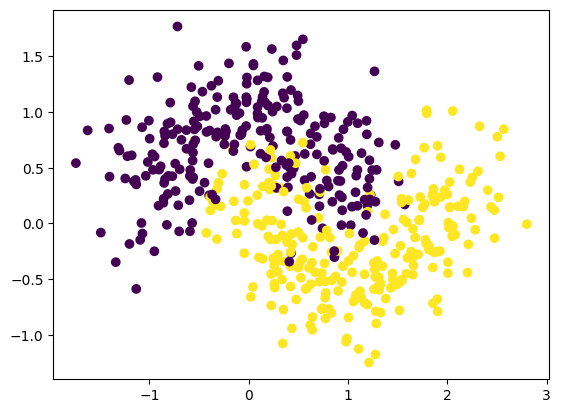

In [5]:
X, y = sklearn.datasets.make_moons(500, noise=0.3,random_state=42) # check what happens,after changing noise = 0,.1,.2,.3
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

#### Spliting the data set into train and test set

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

### Importing all the library for ensemble method and   using inside voting classifier

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

#### Creating objects for individual classifier

In [8]:
log_clf=LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf=RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf=SVC(gamma="scale", random_state=42)

#### Implementing Voting Classifier

In [9]:
voting_clf=VotingClassifier(estimators=[('lr',log_clf),('rf',rnd_clf),('svc',svm_clf)],voting='hard')
voting_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

### Lets look at each classifier's Accuracy on the test set:

In [10]:
from sklearn.metrics import accuracy_score
for clf in (log_clf,rnd_clf,svm_clf,voting_clf):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    print(clf.__class__.__name__,accuracy_score(y_test,y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.912


#### Displaying predicted values for individual predictor/esimator

In [11]:
X_test

array([[ 0.50169252,  0.21717211],
       [ 0.22740469,  0.5899372 ],
       [ 0.26816663,  0.43111374],
       [ 1.31270833, -0.59523574],
       [ 0.41835564, -0.3826774 ],
       [ 0.53680639, -0.32084028],
       [-0.19975183,  1.43509879],
       [-0.85385457,  0.71924064],
       [-0.57050579,  0.00411171],
       [-0.67806633,  0.74946744],
       [ 1.65139719, -0.45980435],
       [-0.02117416,  1.2527051 ],
       [ 0.29583205, -0.33404551],
       [ 0.71998896, -0.12314292],
       [ 2.02747486,  0.14586927],
       [-0.24236873,  0.79608869],
       [ 0.28203507,  1.04835431],
       [ 2.0150763 , -0.03961892],
       [ 1.60780938,  0.20924233],
       [ 0.54362513,  0.7238529 ],
       [-0.08630315,  0.79176103],
       [ 2.50168377,  0.77687965],
       [ 0.57665612,  0.14080644],
       [-0.82479375, -0.01247494],
       [-0.16760529,  0.68163518],
       [ 0.37879701,  0.52357842],
       [ 0.1823981 ,  0.02966123],
       [ 0.0884269 ,  1.28304752],
       [ 1.81320639,

In [12]:
## Votting classifier
voting_clf.fit(X_train,y_train)
y_pred=voting_clf.predict(X_test)
print(y_pred,'\n')
print('Acc: ',accuracy_score(y_test,y_pred))

[1 0 0 1 1 1 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 1 0 0
 1 1 1 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 1
 0 0 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 1
 0 0 1 0 0 0 0 0 1 1 1 0 0 0] 

Acc:  0.912


In [13]:
## Logistic classifier
log_clf.fit(X_train,y_train)
y_pred=log_clf.predict(X_test)
print(y_pred,'\n')
print('Acc: ',accuracy_score(y_test,y_pred))

[1 0 0 1 1 1 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 1 1 0
 1 1 1 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 0 0 1 0 1 0 0 1 1
 0 0 1 1 0 0 1 0 0 1 1 1 1 0 1 1 1 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 1 1
 0 0 0 0 0 0 0 0 1 1 1 0 0 0] 

Acc:  0.864


In [14]:
## Random forest classifier
rnd_clf.fit(X_train,y_train)
y_pred=rnd_clf.predict(X_test)
print(y_pred,'\n')
print('Acc: ',accuracy_score(y_test,y_pred))

[1 0 0 1 1 1 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 1 0 0
 1 1 1 1 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 1 0
 0 0 1 1 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 1
 0 0 1 0 0 0 0 0 1 1 1 0 0 0] 

Acc:  0.896


In [15]:
## Random forest classifier
svm_clf.fit(X_train,y_train)
y_pred=svm_clf.predict(X_test)
print(y_pred,'\n')
print('Acc: ',accuracy_score(y_test,y_pred))

[0 0 0 1 1 1 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0
 1 1 1 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 1
 0 0 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0
 0 0 1 0 0 0 0 0 1 1 1 0 0 0] 

Acc:  0.896


## Please answer the questions below to complete the experiment:

In [19]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [18]:
#@title If it was very easy, what more you would have liked to have been added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "good" #@param {type:"string"}

In [17]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]

In [16]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [20]:
#@title Run this cell to submit your notebook  { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id =return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 4472
Date of submission:  16 Dec 2025
Time of submission:  11:11:32
View your submissions: https://learn-iiith.talentsprint.com/notebook_submissions
